# Preliminary Phase

Let's prepare all libraries for the custom KNN algorithm and data visualization.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier #To run KNeighbor from sklearn and compare
from sklearn.preprocessing import StandardScaler #to normalize data


In [3]:
df = pd.read_csv("titanic.csv") # use the right path to load the file
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X_train = df[["Pclass", "SibSp", "Parch","Fare"]] #taking numerical variables
Y_train = df["Survived"] #Target

# 1) Fast Data Visualization and Data analysis to understand variables weight 

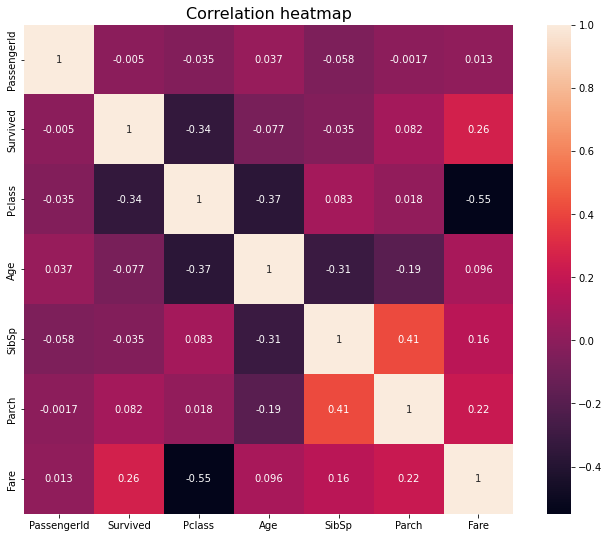

In [5]:
df_correlation_matrix = df.corr()
fig,ax = plt.subplots(figsize = (12,9)) #image dimension
sns.heatmap(df_correlation_matrix, annot=True, square = True)  
plt.title("Correlation heatmap",size=16) 
plt.show()

We can see how two of the variables (Parch and SibSp) chosen in X_train are poor correlated with our target variable, while Fare and Pclass are more correlated to it.

Let's see how these variable are correlated with the Pclass variable.

In [6]:
# Pclass
df[['Pclass', 'Survived']].groupby('Pclass', as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [7]:
# Sex
sex_survival = df[['Sex', 'Survived']].groupby('Sex', as_index=False).mean()
sex_survival

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
df[["Sex","Survived"]].groupby("Sex",as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Sex and Pclass play an important role into establishing who is going to survive and who not.

In [10]:
# Embarked
embarked_survival = df[['Embarked', 'Survived']].groupby('Embarked', as_index=False).mean()
embarked_survival

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


People from Cherbourg are more likely to survive.

In [11]:
# let's create a new column AgeGroup 
df['AgeGroup'] = 0

# Different age_groups
age_groups = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80'] # age groups

# let's divide passengers by age groups (ten groups) 
df['AgeGroup'] = pd.cut(df['Age'], range(0, 90, 10), labels=age_groups) 

def age_group_summary(df, age_groups):
    """Creates a summary for different age groups."""
    # calculating survival rate and number of survivors for different age groups
    age_survival = df[['AgeGroup', 'Survived']].groupby('AgeGroup').agg(['mean', 'count', 'sum'])
    
    # reindex 
    age_survival = age_survival.reindex(age_groups)
    
    
    age_survival.columns = age_survival.columns.droplevel() # remove multilevel index
    age_survival.columns = ['Survival rate', 'Total', 'Survived']
    
    # Creates a new column which considers dead people
    age_survival['Died'] = age_survival['Total'] - age_survival['Survived']
    
    return age_survival
    
# survival rate for different age groups
age_survival = age_group_summary(df, age_groups)

age_survival

,Survival rate,Total,Survived,Died
AgeGroup,,,,
1-10,0.593750,64,38,26
11-20,0.382609,115,44,71
21-30,0.365217,230,84,146
31-40,0.445161,155,69,86
41-50,0.383721,86,33,53
51-60,0.404762,42,17,25
61-70,0.235294,17,4,13
71-80,0.200000,5,1,4


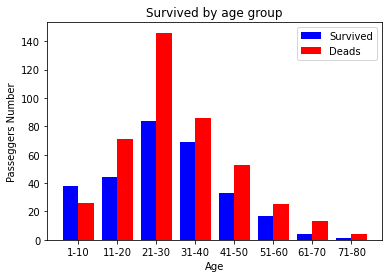

In [17]:
# indexing bars
ind = np.arange(len(age_survival))

# bar width 
width = 0.4


fig, ax = plt.subplots()

survived = age_survival['Survived'].values
bar1 = ax.bar(ind, survived, width=width, color='blue', label='Survived')

died = age_survival['Died'].values
bar2 = ax.bar(ind + width, died, width=width, color='red', 
              label='Deads')

# formatting
ax.set(xlabel='Age',xticks=(ind + 0.2), xticklabels=age_groups, ylabel='Passeggers Number', 
       title='Survived by age group')
plt.legend()

plt.show()

Males are more likely to die.

In [13]:
#Remapping 
df.loc[df["Sex"] == "female", "Sex"] = 0 
df.loc[df['Sex'] == "male", 'Sex'] = 1

In [14]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,21-30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,31-40
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,21-30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,31-40
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,211536,13.0000,NaN,S,21-30
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,112053,30.0000,B42,S,11-20
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,111369,30.0000,C148,C,21-30


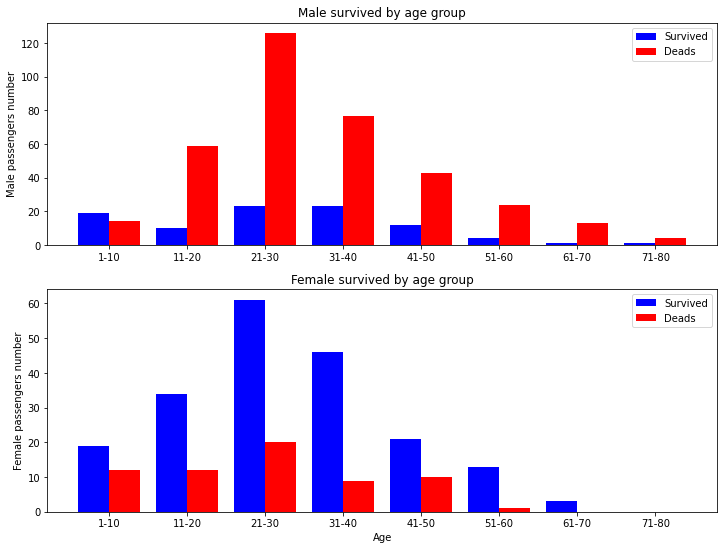

In [16]:
# Let's create two dataframe for each gender
men_df = df.loc[df['Sex'] == 1]
women_df = df.loc[df['Sex'] == 0]

# survival rate by gender 
male_age_survival = age_group_summary(men_df, age_groups)
female_age_survival = age_group_summary(women_df, age_groups)

# bar histogram position
ind = np.arange(len(male_age_survival))

# bar width
width = 0.4

fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(12,9))


# males bar plot 
survived = male_age_survival['Survived'].values
bar11 = ax1.bar(ind, survived, width=width, color='blue', label='Survived')

died = male_age_survival['Died'].values
bar12 = ax1.bar(ind + width, died, width=width, color='red', 
              label='Deads')

# formatting
ax1.set(xticks=(ind + 0.2), xticklabels=age_groups, ylabel='Male passengers number', 
       title='Male survived by age group')
ax1.legend()

# females bar plot 
survived = female_age_survival['Survived'].values
bar21 = ax2.bar(ind, survived, width=width, color='blue', label='Survived')

died = female_age_survival['Died'].values
bar22 = ax2.bar(ind + width, died, width=width, color='red', 
              label='Deads')

# format female bar plot
ax2.set(xlabel='Age', xticks=(ind + 0.2), xticklabels=age_groups, ylabel='Female passengers number', 
       title='Female survived by age group')
ax2.legend()


plt.show()

Survival is more likely in women between 21-30 and 31-40. Women pregnant and with children are privileged. 

Given the importance of age predictor, sex and Embarking, we add them to X_train.

In [18]:
#remapping Embarked
df.loc[df['Embarked'] == "C", 'Embarked'] = 0
df.loc[df['Embarked'] == "Q", 'Embarked'] = 1
df.loc[df['Embarked'] == "S", 'Embarked'] = 2

In [19]:
#Legend: Sex [0 = Female, 1=Male], Embarked [0 = "C", 1 = "Q", 2= "S"]


# 2) Custom machine learning algorithm (KNearestNeighbors) and accuracy comparison

Let's prepare dataset  

In [20]:
df["Age"].isnull().sum()

177

In [21]:
#remapping Embarked
df.loc[df['Embarked'] == "C", 'Embarked'] = 0
df.loc[df['Embarked'] == "Q", 'Embarked'] = 1
df.loc[df['Embarked'] == "S", 'Embarked'] = 2
#Remapping 
df.loc[df["Sex"] == "female", "Sex"] = 0 
df.loc[df['Sex'] == "male", 'Sex'] = 1

In [22]:
# For our specific purpose, let's remove NAN values
df_reduced = df.dropna(subset=["Age"],inplace=False)
df_reduced = df_reduced.dropna(subset=["Embarked"],inplace=False)

In [23]:
X_train = df_reduced[["Pclass","Sex","Age","Fare"]]
Y_train = df_reduced["Survived"]

In [24]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(X_train) #Normalizing data. Z = (x-X_mean)/sigma

Let's run sklearn algorithm and calculate accuracy.

In [25]:
knnClassifier = KNeighborsClassifier().fit(scaled_data,Y_train)
acc_log = round(knnClassifier.score(scaled_data,Y_train)*100,2)
acc_log

86.8

After many trials on different features, the most important ones seems to be Age, Sex, Pclass and Fare. Other variable combinations seem (for our specific algorithm purpose) to decrease accuracy. It could be due to redundancy.

Sklearn algorithm accuracy is 86.8 %. Now I am going to build two customs KNN algorithms I am going to test the first algorithm using all the features or some of the features, while the second custom KNN algorithm is going to be an hybrid between KNN and Naive Bayes. I am going to use for the latter an informative variable (Pclass or Sex) as a prior, while other variables are going to be used to calculate the likelihood (calculated through KNN based distance). Finally, I am going to plot accuracies for different k values

In [30]:
def KNearest_Neighbours_Custom(X_train,Y_train,k):
    # Function takes X_train and Y_train, and number of neighbors to calculate accuracy
    scalar = StandardScaler()
    Data = scalar.fit_transform(X_train) #Normalizing data
    
    Targets = np.array(Y_train) #Let's transform target vector into an array
    Y_hat = np.zeros(len(Targets)) # initializing a vector with predictions  
    for i,v in enumerate(Data):
        # Let's calculate n_dim euclidian distance . For each point I am going to compute euclidian 
        # distance between all other points
        subtraction_vector = Data - v   
        norm_vector_q = np.sum(subtraction_vector**2,axis=1)
        norms_vector = np.sqrt(norm_vector_q) 
        
        sorted_vector_indeces = np.argsort(norms_vector) #Ordering indeces 
        
        KNeighbours = sorted_vector_indeces[1:k+1] #Taking all points, but not the first one which is the point itself
        
        Survived_subsample = Targets[KNeighbours] #Let's see who survived and who not
        #Let's start votations! :)
        Number_survived = sum(Survived_subsample==1) 
        Number_not_survived = sum(Survived_subsample==0)
        
        #Aggiorno il vettore Y_hat (predizioni)
        if Number_survived >= Number_not_survived:
            Y_hat[i] = 1
        else:
            Y_hat[i] = 0
       
    
    
    Accuracy_vector = Targets == Y_hat #Boolean comparison
    Accuracy_value = np.round(sum(Accuracy_vector==True)/len(Accuracy_vector)*100,2) #Accuracy calculation
    return(Accuracy_value,Y_hat) 

Let's plot accuracies values vs k

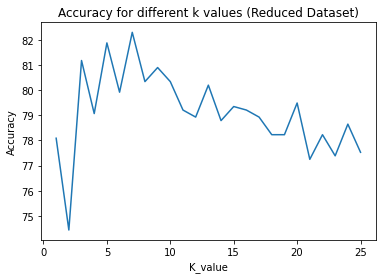

In [31]:
plot_vector_neighbor_1 = np.zeros(25) 
for k in range(1,26): 
    plot_vector_neighbor_1[k-1] = KNearest_Neighbours_Custom(X_train,Y_train,k)[0] 
plt.plot(range(1,26),plot_vector_neighbor_1)
plt.xlabel("K_value")
plt.ylabel("Accuracy")
plt.title("Accuracy for different k values (Reduced Dataset)")
plt.show()

In [32]:
print(plot_vector_neighbor_1)
print(np.max(plot_vector_neighbor_1))
print(np.argmax(plot_vector_neighbor_1))

[78.09 74.44 81.18 79.07 81.88 79.92 82.3  80.34 80.9  80.34 79.21 78.93
 80.2  78.79 79.35 79.21 78.93 78.23 78.23 79.49 77.25 78.23 77.39 78.65
 77.53]
82.3
6


Algorithm reachs 82.3 % of accuracy with 7 neighbors. N.B. Python indexing starts at 0

Now, let's try with all numerical features

In [33]:
X_train_complete = df_reduced[["Pclass","Sex","Age","Fare","SibSp","Parch","Embarked"]]
Y_train_complete = df_reduced["Survived"]

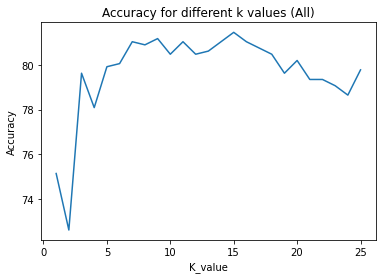

In [34]:
plot_vector_neighbor_2 = np.zeros(25) 
for k in range(1,26): 
    plot_vector_neighbor_2[k-1] = KNearest_Neighbours_Custom(X_train_complete,Y_train_complete,k)[0] 
plt.plot(range(1,26),plot_vector_neighbor_2)
plt.xlabel("K_value")
plt.ylabel("Accuracy")
plt.title("Accuracy for different k values (All)")
plt.show()

In [35]:
print(plot_vector_neighbor_2)
print(np.max(plot_vector_neighbor_2))
print(np.argmax(plot_vector_neighbor_2))

[75.14 72.61 79.63 78.09 79.92 80.06 81.04 80.9  81.18 80.48 81.04 80.48
 80.62 81.04 81.46 81.04 80.76 80.48 79.63 80.2  79.35 79.35 79.07 78.65
 79.78]
81.46
14


This time accuracy reachs 81.46% with 15 neighbors. Lower than before.

## Hybrid KNearest_Neighbours

In [36]:
def KNearest_Neighbours_Bayesian_function(df_reduced,X_train,Y_train,k):
    # I am going to build prior based on number of survivors and not survivors for each Pclass.
    # Likelihood is calculating using kNearest Neighbours approach on all other features
    Prior_survived_class_1 = sum(df_reduced.loc[df_reduced["Pclass"] ==1,"Survived"])/len(df_reduced["Survived"])
    Prior_Not_survived_class_1 =  (len(df_reduced.loc[df_reduced["Pclass"] ==1,"Survived"]) - sum(df_reduced.loc[df_reduced["Pclass"] ==1,"Survived"]))/len(df_reduced["Survived"])
    Prior_survived_class_2 = sum(df_reduced.loc[df_reduced["Pclass"] ==2,"Survived"])/len(df_reduced["Survived"])
    Prior_Not_survived_class_2 =  (len(df_reduced.loc[df_reduced["Pclass"] ==2,"Survived"]) - sum(df_reduced.loc[df_reduced["Pclass"] ==2,"Survived"]))/len(df_reduced["Survived"])
    Prior_survived_class_3 = sum(df_reduced.loc[df_reduced["Pclass"] ==3,"Survived"])/len(df_reduced["Survived"])
    Prior_Not_survived_class_3 =  (len(df_reduced.loc[df_reduced["Pclass"] ==3,"Survived"]) - sum(df_reduced.loc[df_reduced["Pclass"] ==3,"Survived"]))/len(df_reduced["Survived"])
    
    
    Pclass = np.array(X_train)[:,0] #Convert Pclass into an array 
    scalar = StandardScaler()
    Data = scalar.fit_transform(X_train)
    Targets = np.array(Y_train)
    
    Y_hat = np.zeros(len(Targets))
    for i,v in enumerate(Data):
        subtraction_vector = Data - v 
        norm_vector_q = np.sum(subtraction_vector**2,axis=1)
        norms_vector = np.sqrt(norm_vector_q) 
        
        Pclass_passenger = Pclass[i] #Considering passenger class
        sorted_vector_indeces = np.argsort(norms_vector)
        KNeighbours = sorted_vector_indeces[1:k+1]
        
        Survived_subsample = Targets[KNeighbours]
        #Here is the difference. I estimate the likelihood by counting neighbours and dividing for k 
        
        Prob_survived_likelihood = sum(Survived_subsample==1)/k 
        Prob_not_survived_likelihood = sum(Survived_subsample==0)/k
        
        Prior_class_survived = locals()["Prior_survived_class_" + str(int(Pclass_passenger))] 
        Prior_class_not_survived = locals()["Prior_Not_survived_class_" + str(int(Pclass_passenger))]
        
        #Calculating posterior. 
        
        Posterior = (Prior_class_survived*Prob_survived_likelihood)/(Prior_class_survived*Prob_survived_likelihood 
                                                                     + Prior_class_not_survived*Prob_not_survived_likelihood)
        if Posterior > 0.75: #Threshold for survivor
            Y_hat[i] = 1
        else:
            Y_hat[i] = 0
    
    
    Accuracy_vector = Targets == Y_hat
    Accuracy_value = np.round(sum(Accuracy_vector==True)/len(Accuracy_vector)*100,2)
    return(Accuracy_value,Y_hat,Posterior)

Same as before. Let's calculate accuracy for different k values

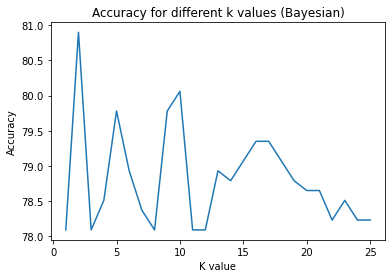

In [38]:
plot_vector_neighbor_Bayesian = np.zeros(25) 
for k in range(1,26): 
    plot_vector_neighbor_Bayesian[k-1] = KNearest_Neighbours_Bayesian_function(df_reduced,X_train,Y_train,k)[0] 
plt.plot(range(1,26),plot_vector_neighbor_Bayesian)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy for different k values (Bayesian)")
plt.show()

In [39]:
print(plot_vector_neighbor_Bayesian)
print(np.max(plot_vector_neighbor_Bayesian))
print(np.argmax(plot_vector_neighbor_Bayesian))

[78.09 80.9  78.09 78.51 79.78 78.93 78.37 78.09 79.78 80.06 78.09 78.09
 78.93 78.79 79.07 79.35 79.35 79.07 78.79 78.65 78.65 78.23 78.51 78.23
 78.23]
80.9
1


Accuracy is decresed to 80.90 %. Let's try a more informative prior like Sex. 

In [47]:
def KNearest_Neighbours_Bayesian_2(df_reduced,X_train,Y_train,k):
    
    
    Prior_survived_0 = sum(df_reduced.loc[df_reduced["Sex"]==0,"Survived"])/len(df_reduced["Survived"])
    Prior_Not_survived_0 = (len(df_reduced.loc[df_reduced["Sex"] ==0,"Survived"]) - sum(df_reduced.loc[df_reduced["Sex"] ==0,"Survived"]))/len(df_reduced["Survived"])
    Prior_survived_1 = sum(df_reduced.loc[df_reduced["Sex"]==1,"Survived"])/len(df_reduced["Survived"])
    Prior_Not_survived_1 = (len(df_reduced.loc[df_reduced["Sex"] ==1,"Survived"]) - sum(df_reduced.loc[df_reduced["Sex"] ==1,"Survived"]))/len(df_reduced["Survived"])
    
    
    
    Sex = np.array(X_train)[:,1] 
    scalar = StandardScaler()
    Data = scalar.fit_transform(X_train)
    Targets = np.array(Y_train)
    
    Y_hat = np.zeros(len(Targets))
    for i,v in enumerate(Data):
        subtraction_vector = Data - v 
        norm_vector_q = np.sum(subtraction_vector**2,axis=1) 
        norms_vector = np.sqrt(norm_vector_q) 
        
        Passenger_sex = Sex[i] 
        sorted_vector_indeces = np.argsort(norms_vector)
        KNeighbours = sorted_vector_indeces[1:k+1]
        
        Survived_subsample = Targets[KNeighbours]
        
        
        Prob_survived_likelihood = sum(Survived_subsample==1)/k 
        Prob_not_survived_likelihood = sum(Survived_subsample==0)/k
        
        Prior_class_survived = locals()["Prior_survived_" + str(int(Passenger_sex))] 
        Prior_class_not_survived = locals()["Prior_Not_survived_" + str(int(Passenger_sex))] 
        
        
        Posterior = (Prior_class_survived*Prob_survived_likelihood)/(Prior_class_survived*Prob_survived_likelihood + 
                                                                     Prior_class_not_survived*Prob_not_survived_likelihood)
        if Posterior > 0.80: 
            Y_hat[i] = 1
        else:
            Y_hat[i] = 0
    
    
    Accuracy_vector = Targets == Y_hat
    Accuracy_value = np.round(sum(Accuracy_vector==True)/len(Accuracy_vector)*100,2)
    return(Accuracy_value,Y_hat,Posterior)

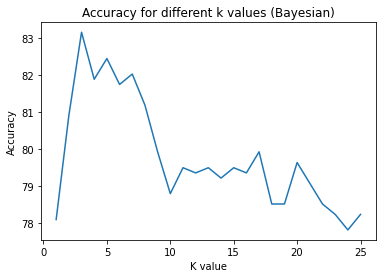

In [48]:
plot_vector_neighbor_Bayesian_2 = np.zeros(25) 
for k in range(1,26): 
    plot_vector_neighbor_Bayesian_2[k-1] = KNearest_Neighbours_Bayesian_2(df_reduced,X_train,Y_train,k)[0] 
plt.plot(range(1,26),plot_vector_neighbor_Bayesian_2)
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.title("Accuracy for different k values (Bayesian)")
plt.show()

In [49]:
print(plot_vector_neighbor_Bayesian_2)
print(np.max(plot_vector_neighbor_Bayesian_2))
print(np.argmax(plot_vector_neighbor_Bayesian_2))

[78.09 80.9  83.15 81.88 82.44 81.74 82.02 81.18 79.92 78.79 79.49 79.35
 79.49 79.21 79.49 79.35 79.92 78.51 78.51 79.63 79.07 78.51 78.23 77.81
 78.23]
83.15
2


We obtain excellent results (83.15 % accuracy). Sex as a prior paid off. 

# 3) Final Considerations

Home made KNN algorithms work well. The difference between sklearn algorithm and these custom ones are probably due to the different structure of sklearn KNN. In fact that one is implemented with a tree like structure and can weight and rank features in a slightly more precise way.